
# **Classification Naive Bayes by Febrian Murti Dewanto**

------------
**PORTOFOLIO **
my video 📹



 https://youtu.be/CfiTJ0vhOMM

Supervised Learning
- data with target/label/class
- data type nominal/categorical
- **Naive Bayes**, K-Nearest Neighbour, Dicision Tree C4.5, ID3, CART, Linear Discriminant Analysis, SVM ,etc
--------------------------------------------------------

CLASSIFICATION CLAIM INSURANCE WITH NAIVE BAYES

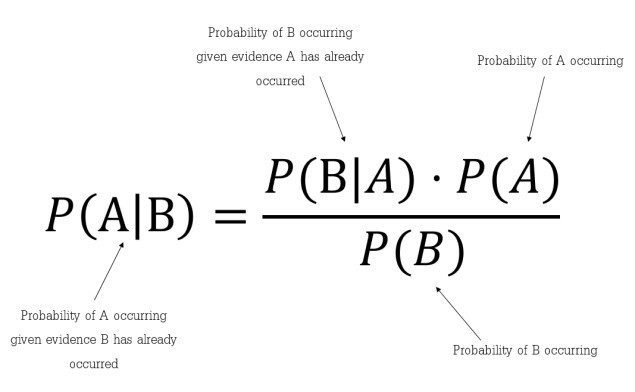


1. IMPORT LIBRARY


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2. IMPORT DATASET Car Insurance Data
Insurance Claims over Cars SAGNIK ROY  [kaggle link](https://www.kaggle.com/datasets/sagnik1511/car-insurance-data?datasetId=1450044&sortBy=voteCount)
---
About Dataset
Context
The company has shared its annual car insurance data with the real customer behaviors over the data.

Content
The columns are resembling practical world features.
The outcome column indicates 1 if a customer has claimed his/her loan else 0.
The data has 19 features from there 18 of them are corresponding logs which were taken by the company

In [ ]:
#dataset = pd.read_csv("Car_Insurance_Claim.csv")
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Car_Insurance_Claim.csv")

In [ ]:
dataset.shape

(10000, 19)

In [ ]:
#print first five rows
dataset.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
#Check the info of the data set which describes null values, data type, memory usage
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [ ]:
dataset.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


3. DATA CLEANING

In [ ]:
dataset["AGE"].replace({"16-25": "Young", "26-39": "Middle Age","40-64":"Old","65+":"Very Old"}, inplace=True)
dataset["DRIVING_EXPERIENCE"].replace({"0-9y": "Newbie", "10-19y": "Amateur","20-29y":"Advanced","30y+":"Expert"}, inplace=True)

In [ ]:
def fillna(dataframe,feature_cols):
    total_cols=0
    for y in feature_cols:
        total_cols+=1
        if dataframe[y].isna().sum()>1:
            try:
                dataframe[y]=dataframe[y].fillna(int(np.mean(dataframe[y])))
            except ValueError:
                pass
        else:
            continue
    print(f"There are {total_cols} columns")

feature_cols=["CREDIT_SCORE","ANNUAL_MILEAGE"]
fillna(dataset,feature_cols)

There are 2 columns


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         10000 non-null  float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       10000 non-null  float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

4. E D A

In [ ]:
dataset.OUTCOME.value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

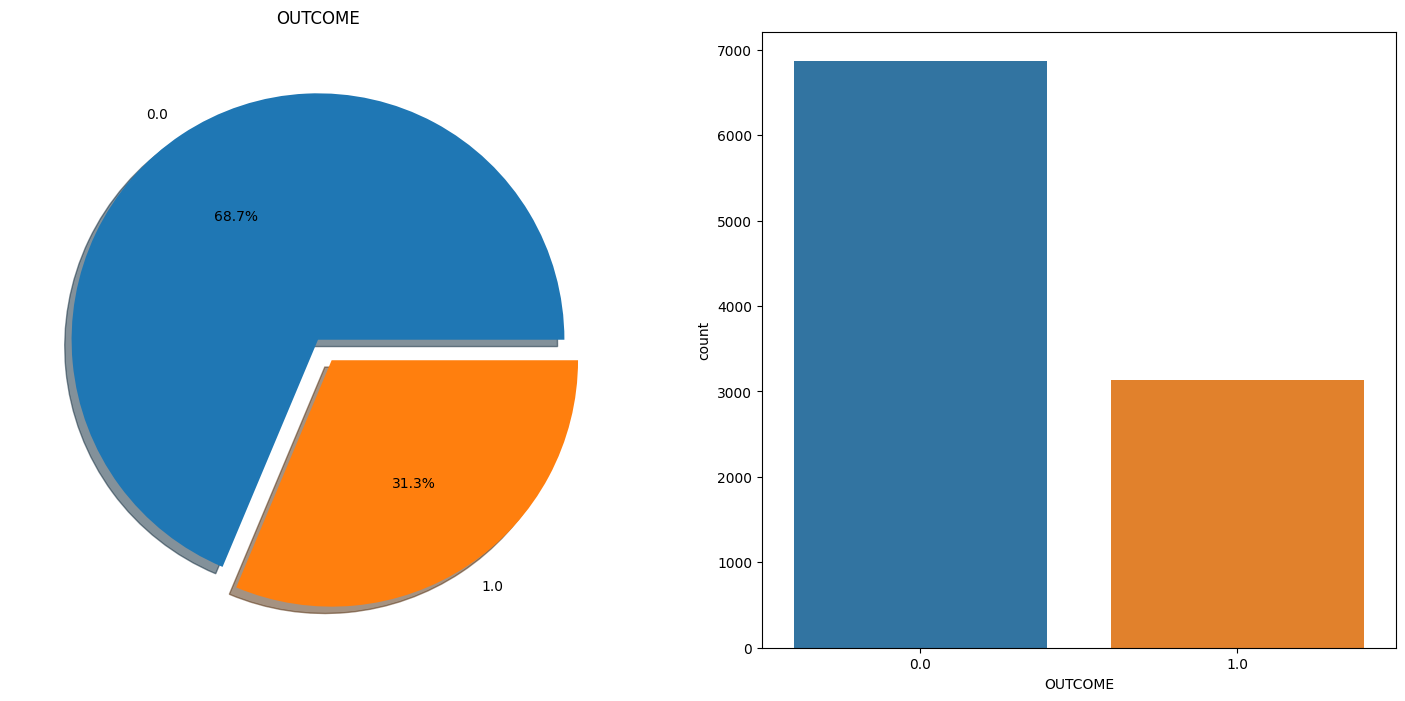

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['OUTCOME'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('OUTCOME')
ax[0].set_ylabel('')
sns.countplot(x='OUTCOME',data=dataset,ax=ax[1])


plt.show()

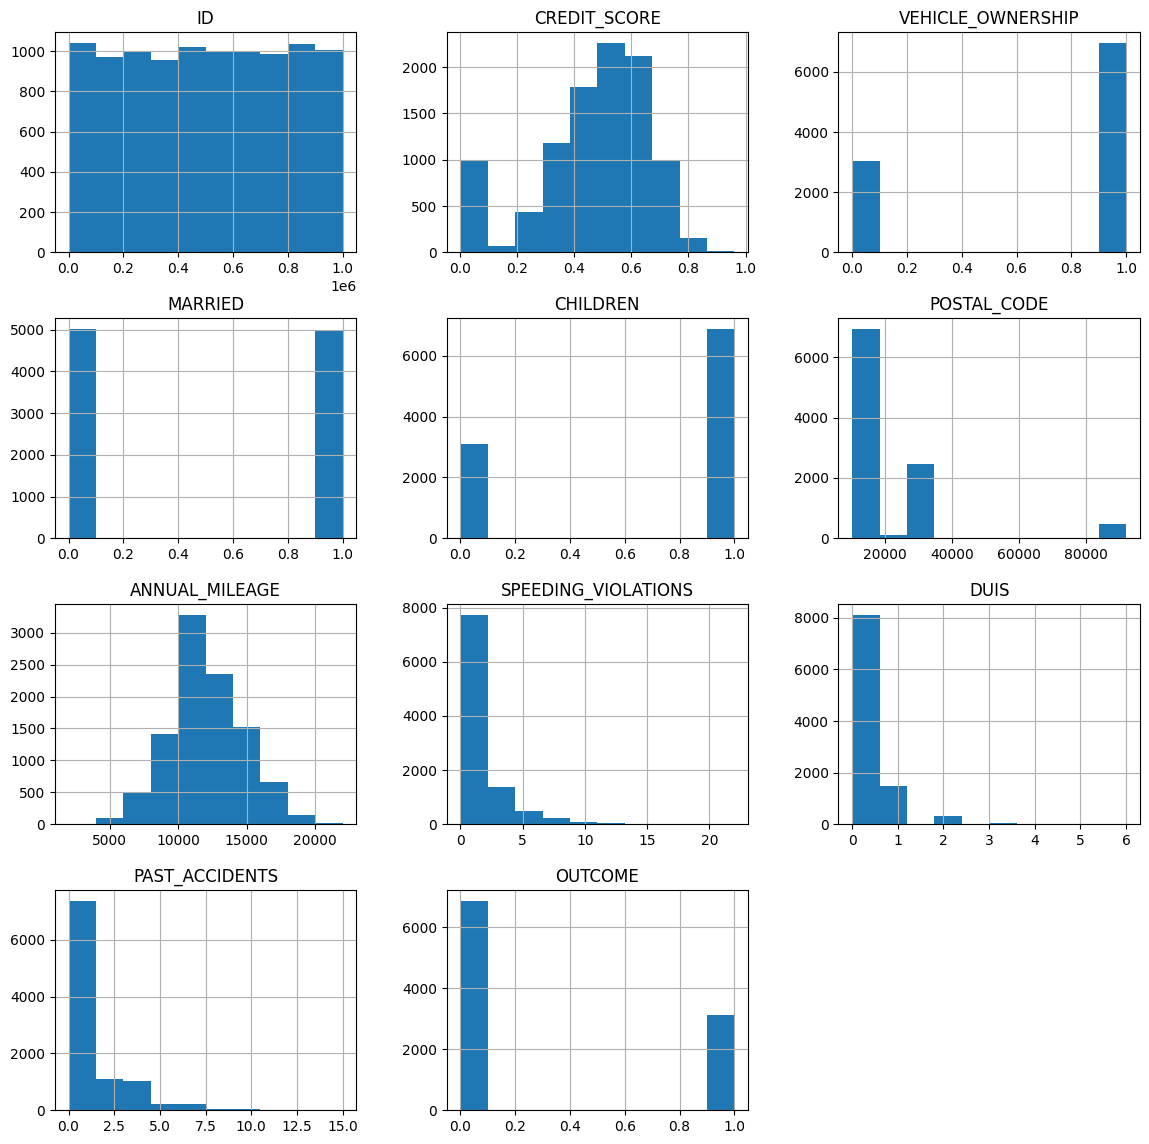


Data Variance


<ipython-input-13-b7a1f255cc46>:7: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return dataframe.var()


ID                     8.411785e+10
CREDIT_SCORE           4.066017e-02
VEHICLE_OWNERSHIP      2.112121e-01
MARRIED                2.500218e-01
CHILDREN               2.143760e-01
POSTAL_CODE            3.578004e+08
ANNUAL_MILEAGE         7.183297e+06
SPEEDING_VIOLATIONS    5.026410e+00
DUIS                   3.080142e-01
PAST_ACCIDENTS         2.730603e+00
OUTCOME                2.151646e-01
dtype: float64

In [ ]:
def var_distribution2(dataframe):
    import matplotlib.pyplot as plt
    numbers = pd.Series(dataframe.columns)
    dataframe[numbers].hist(figsize=(14,14))
    plt.show();
    print("\nData Variance")
    return dataframe.var()

var_distribution2(dataset)

<ipython-input-14-3b295514fd53>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataframe.corr().round(2)
<ipython-input-14-3b295514fd53>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()[target_variable].abs().sort_values(ascending = False)


OUTCOME                1.000000
VEHICLE_OWNERSHIP      0.378921
PAST_ACCIDENTS         0.311495
SPEEDING_VIOLATIONS    0.291862
MARRIED                0.262104
CHILDREN               0.232835
CREDIT_SCORE           0.198353
DUIS                   0.189352
ANNUAL_MILEAGE         0.177575
POSTAL_CODE            0.095889
ID                     0.010506
Name: OUTCOME, dtype: float64

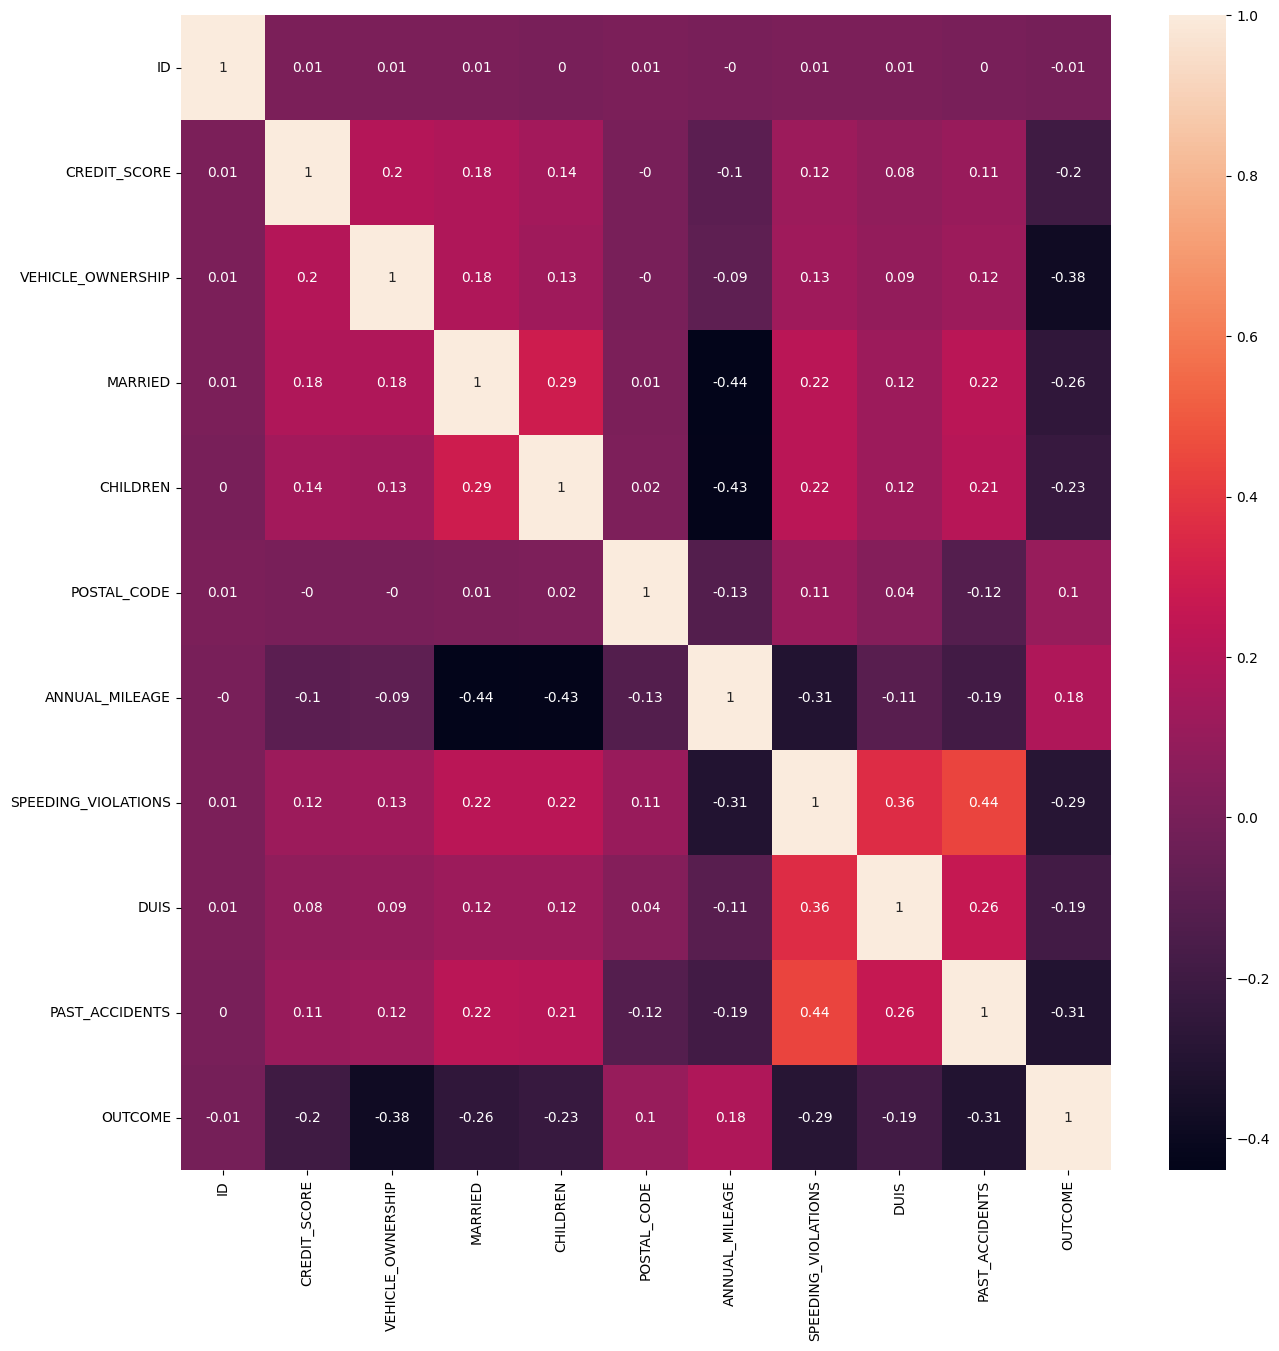

In [ ]:
def corr(dataframe,target_variable):
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(15,15))
    correlation_matrix = dataframe.corr().round(2)
    sns.heatmap(data=correlation_matrix, annot=True)

    correlation = dataset.corr()[target_variable].abs().sort_values(ascending = False)
    return correlation
corr(dataset,"OUTCOME")

5. DATA PREPROCESSING

In [ ]:
X = dataset.drop(['OUTCOME','ID'], axis=1)
y = dataset['OUTCOME']
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.shape

(10000, 24)

In [ ]:
y.shape

(10000,)

In [ ]:
X.head()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE_Old,...,DRIVING_EXPERIENCE_Amateur,DRIVING_EXPERIENCE_Expert,DRIVING_EXPERIENCE_Newbie,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sports car
0,0.629027,1.0,0.0,1.0,10238,12000.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.357757,0.0,0.0,0.0,10238,16000.0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
2,0.493146,1.0,0.0,0.0,10238,11000.0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,0.206013,1.0,0.0,1.0,32765,11000.0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
4,0.388366,1.0,0.0,0.0,32765,12000.0,2,0,1,0,...,1,0,0,1,0,0,0,1,1,0


In [ ]:
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: OUTCOME, dtype: float64

5.1 SPLIT DATA

In [ ]:
# Splitting data into training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_train.head()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE_Old,...,DRIVING_EXPERIENCE_Amateur,DRIVING_EXPERIENCE_Expert,DRIVING_EXPERIENCE_Newbie,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sports car
2967,0.316777,1.0,0.0,1.0,92101,12000.0,3,1,2,1,...,0,0,0,1,0,0,0,1,0,0
700,0.627258,0.0,0.0,0.0,10238,14000.0,2,0,3,0,...,0,1,0,0,0,0,0,0,1,0
3481,0.629171,1.0,1.0,1.0,10238,11000.0,2,3,0,0,...,1,0,0,0,0,0,0,0,1,0
1621,0.397402,1.0,1.0,1.0,10238,11000.0,7,0,4,0,...,0,1,0,0,0,0,1,0,0,0
800,0.490817,0.0,1.0,1.0,10238,10000.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
sc = StandardScaler()

# Fitting Standard Scaller
X_train = sc.fit_transform(X_train)

# Scaling data
X_test = sc.transform(X_test)

6. MODEL

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)



GaussianNB()

In [ ]:
y_pred =classifier.predict(X_test)

7.EVALUATION

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[1293  409]
 [ 167  631]]


[[1293  409]
 [ 167  631]]
Accuracy Score:  0.7696


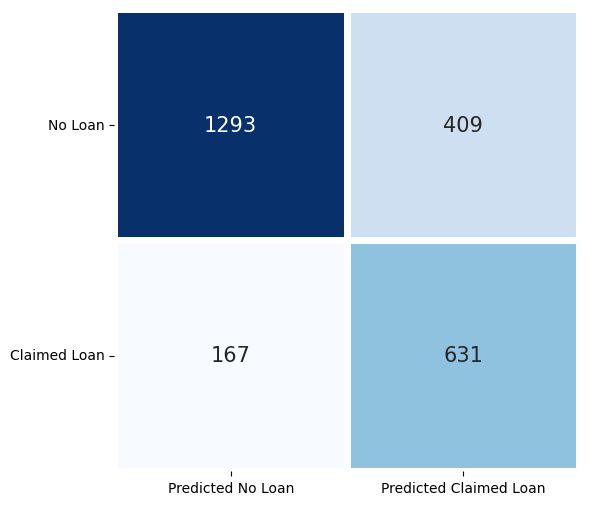

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
print(cm)
#print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
#roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_test, y_pred)*100
#accuracies['GaussianNB'] = acc



sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))


